In [1]:
import pandas as pd
import numpy as np
import json

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [6]:
df.tail(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [7]:
df.drop(columns = ['homepage', 'id', 'keywords', 'overview', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title'], inplace = True)

In [8]:
df.isnull().sum()

budget               0
genres               0
original_language    0
original_title       0
popularity           0
release_date         1
revenue              0
runtime              2
vote_average         0
vote_count           0
dtype: int64

In [9]:
list_del = (np.where(df['budget'] == df['revenue'])[0])

In [11]:
list_del

array([ 265,  406,  453,  463,  474,  584,  601,  721,  735,  745,  757,
        881,  915,  948, 1011, 1016, 1028, 1032, 1066, 1069, 1080, 1142,
       1202, 1225, 1229, 1248, 1250, 1261, 1268, 1269, 1274, 1282, 1288,
       1301, 1321, 1349, 1350, 1355, 1360, 1380, 1392, 1397, 1402, 1442,
       1453, 1464, 1511, 1522, 1569, 1575, 1580, 1600, 1619, 1624, 1637,
       1651, 1665, 1666, 1669, 1673, 1676, 1687, 1691, 1692, 1705, 1729,
       1755, 1763, 1768, 1775, 1776, 1793, 1805, 1824, 1843, 1854, 1857,
       1865, 1880, 1899, 1900, 1908, 1919, 1930, 1933, 1937, 1947, 1949,
       1950, 1973, 1985, 2001, 2004, 2005, 2009, 2038, 2047, 2048, 2051,
       2055, 2059, 2062, 2081, 2104, 2110, 2127, 2138, 2146, 2156, 2161,
       2164, 2182, 2190, 2201, 2206, 2209, 2210, 2211, 2226, 2232, 2236,
       2241, 2242, 2248, 2249, 2255, 2256, 2259, 2260, 2263, 2268, 2271,
       2272, 2283, 2287, 2292, 2295, 2305, 2309, 2321, 2331, 2347, 2349,
       2363, 2364, 2367, 2372, 2373, 2376, 2379, 23

In [12]:
df.drop(list_del, inplace = True)

In [13]:
np.where(df.isnull())[0]

array([2458, 3568], dtype=int64)

In [14]:
df.dropna(inplace = True)

In [15]:
df.shape

(3909, 10)

In [16]:
df.isnull().sum()

budget               0
genres               0
original_language    0
original_title       0
popularity           0
release_date         0
revenue              0
runtime              0
vote_average         0
vote_count           0
dtype: int64

In [88]:
temp = json.loads(df['genres'])

KeyError: 'genres'

In [18]:
df.head(5)

,budget,genres,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,2015-10-26,880674609,148.0,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,2012-03-07,284139100,132.0,6.1,2124


<Axes: xlabel='vote_average', ylabel='budget'>

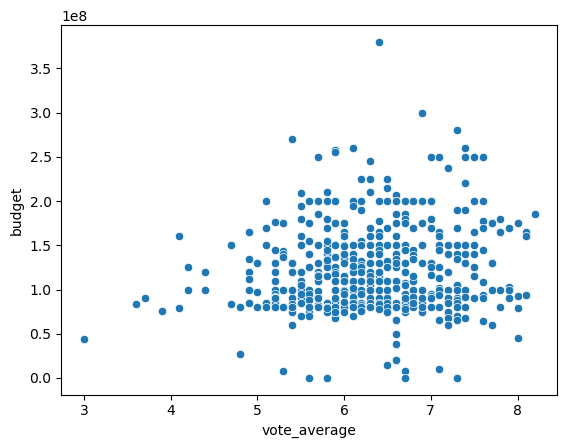

In [19]:
sns.scatterplot(data = df.head(500), y = 'budget', x = 'vote_average')

In [21]:
def extract_name(data):
  try:
    json_data = json.loads(data)
    if isinstance(json_data, list) and len(json_data) > 0:
      return json_data[0]['name']
    else:
      return None 
  except (json.JSONDecodeError, KeyError, IndexError) as e:
    print(f"Error processing data: {e}")
    return None

In [22]:
df['type'] = df['genres'].apply(extract_name)

In [23]:
df.head()

,budget,genres,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,type
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,11800,Action
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9,4500,Adventure
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,2015-10-26,880674609,148.0,6.3,4466,Action
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6,9106,Action
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,2012-03-07,284139100,132.0,6.1,2124,Action


In [24]:
df.drop(columns = ['genres'], inplace = True)

In [25]:
df.sample(5)

,budget,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,type
1376,35000000,en,In & Out,11.897925,1997-09-10,0,90.0,6.3,177,Comedy
395,85000000,en,The Holiday,44.967453,2006-12-08,194168700,136.0,6.7,1225,Comedy
2948,11000000,en,Vera Drake,4.131918,2004-10-22,0,125.0,6.8,80,Crime
1111,40000000,en,Victor Frankenstein,24.821138,2015-11-10,34227298,109.0,5.6,685,Drama
1078,50000000,en,The Ant Bully,20.239061,2006-07-27,55181129,88.0,5.5,366,Fantasy


In [26]:
df['original_language'].nunique()

31

In [27]:
df['original_language'].value_counts()

original_language
en    3712
fr      42
es      27
zh      19
de      17
ja      15
hi      11
ko       9
ru       9
cn       9
it       7
da       6
nl       3
pt       3
th       2
fa       2
id       2
he       1
ps       1
no       1
ro       1
vi       1
af       1
pl       1
sv       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [28]:
language_low = df['original_language'].value_counts()

In [29]:
language_low

original_language
en    3712
fr      42
es      27
zh      19
de      17
ja      15
hi      11
ko       9
ru       9
cn       9
it       7
da       6
nl       3
pt       3
th       2
fa       2
id       2
he       1
ps       1
no       1
ro       1
vi       1
af       1
pl       1
sv       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [30]:
language_pren = language_low[language_low < 18]

In [31]:
language_pren = language_pren.index

In [32]:
language_pren

Index(['de', 'ja', 'hi', 'ko', 'ru', 'cn', 'it', 'da', 'nl', 'pt', 'th', 'fa',
       'id', 'he', 'ps', 'no', 'ro', 'vi', 'af', 'pl', 'sv', 'nb', 'tr', 'is',
       'xx', 'te', 'el'],
      dtype='object', name='original_language')

In [33]:
df = df[~df['original_language'].isin(language_pren)]
# df = df[~df['your column'].isin(['list of strings'])]

In [34]:
df.shape

(3800, 10)

In [35]:
df['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4788    1972-03-12
4791    2007-01-01
4796    2004-10-08
4798    1992-09-04
4799    2011-12-26
Name: release_date, Length: 3800, dtype: object

In [44]:
def extract_date(data):
    try:
        return data.split('-')[2]
    except :
        print(f"Error processing data: {e}")
        return None

In [41]:
(df['release_date'][0].split('-'))[0]

'2009'

In [38]:
df['year'] = df['release_date'].apply(extract_date)

C:\Users\jaysh\AppData\Local\Temp\ipykernel_3476\2052363707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['release_date'].apply(extract_date)


In [46]:
df.head()

,budget,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,type,year,month,day
0,237000000,en,Avatar,150.437577,2009-12-10,2787965087,162.0,7.2,11800,Action,2009,12,10
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,961000000,169.0,6.9,4500,Adventure,2007,05,19
2,245000000,en,Spectre,107.376788,2015-10-26,880674609,148.0,6.3,4466,Action,2015,10,26
3,250000000,en,The Dark Knight Rises,112.312950,2012-07-16,1084939099,165.0,7.6,9106,Action,2012,07,16
4,260000000,en,John Carter,43.926995,2012-03-07,284139100,132.0,6.1,2124,Action,2012,03,07


In [47]:
df.isnull().sum()

budget               0
original_language    0
original_title       0
popularity           0
release_date         0
revenue              0
runtime              0
vote_average         0
vote_count           0
type                 4
year                 0
month                0
day                  0
dtype: int64

In [42]:
df['month'] = df['release_date'].apply(extract_date)

C:\Users\jaysh\AppData\Local\Temp\ipykernel_3476\495591926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['release_date'].apply(extract_date)


In [45]:
df['day'] = df['release_date'].apply(extract_date)

C:\Users\jaysh\AppData\Local\Temp\ipykernel_3476\1097471349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['release_date'].apply(extract_date)


In [48]:
df.drop(columns = ['release_date'], inplace = True)

C:\Users\jaysh\AppData\Local\Temp\ipykernel_3476\906315962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['release_date'], inplace = True)


C:\Users\jaysh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Count'>

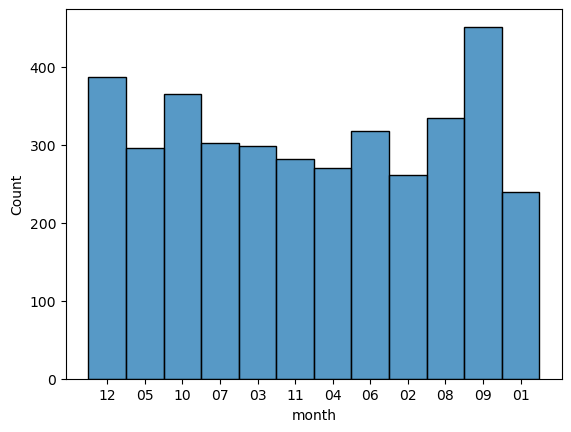

In [49]:
sns.histplot(data = df, x = 'month')

In [50]:
np.where(df['type'].isnull())

(array([3466, 3576, 3586, 3703], dtype=int64),)

In [51]:
df.isnull().sum()

budget               0
original_language    0
original_title       0
popularity           0
revenue              0
runtime              0
vote_average         0
vote_count           0
type                 4
year                 0
month                0
day                  0
dtype: int64

In [52]:
df.isnull().sum()

budget               0
original_language    0
original_title       0
popularity           0
revenue              0
runtime              0
vote_average         0
vote_count           0
type                 4
year                 0
month                0
day                  0
dtype: int64

In [53]:
df.dropna()

,budget,original_language,original_title,popularity,revenue,runtime,vote_average,vote_count,type,year,month,day
0,237000000,en,Avatar,150.437577,2787965087,162.0,7.2,11800,Action,2009,12,10
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,961000000,169.0,6.9,4500,Adventure,2007,05,19
2,245000000,en,Spectre,107.376788,880674609,148.0,6.3,4466,Action,2015,10,26
3,250000000,en,The Dark Knight Rises,112.312950,1084939099,165.0,7.6,9106,Action,2012,07,16
4,260000000,en,John Carter,43.926995,284139100,132.0,6.1,2124,Action,2012,03,07
...,...,...,...,...,...,...,...,...,...,...,...,...
4788,12000,en,Pink Flamingos,4.553644,6000000,93.0,6.2,110,Horror,1972,03,12
4791,13,en,Tin Can Man,0.332679,0,84.0,2.0,1,Horror,2007,01,01
4796,7000,en,Primer,23.307949,424760,77.0,6.9,658,Science Fiction,2004,10,08
4798,220000,es,El Mariachi,14.269792,2040920,81.0,6.6,238,Action,1992,09,04


In [54]:
df['type'].value_counts()

type
Drama              897
Comedy             798
Action             655
Adventure          307
Horror             241
Crime              164
Thriller           148
Animation          105
Fantasy            100
Science Fiction     86
Romance             85
Documentary         46
Family              41
Mystery             32
Music               27
War                 21
Western             21
History             20
TV Movie             1
Foreign              1
Name: count, dtype: int64

In [55]:
df

,budget,original_language,original_title,popularity,revenue,runtime,vote_average,vote_count,type,year,month,day
0,237000000,en,Avatar,150.437577,2787965087,162.0,7.2,11800,Action,2009,12,10
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,961000000,169.0,6.9,4500,Adventure,2007,05,19
2,245000000,en,Spectre,107.376788,880674609,148.0,6.3,4466,Action,2015,10,26
3,250000000,en,The Dark Knight Rises,112.312950,1084939099,165.0,7.6,9106,Action,2012,07,16
4,260000000,en,John Carter,43.926995,284139100,132.0,6.1,2124,Action,2012,03,07
...,...,...,...,...,...,...,...,...,...,...,...,...
4788,12000,en,Pink Flamingos,4.553644,6000000,93.0,6.2,110,Horror,1972,03,12
4791,13,en,Tin Can Man,0.332679,0,84.0,2.0,1,Horror,2007,01,01
4796,7000,en,Primer,23.307949,424760,77.0,6.9,658,Science Fiction,2004,10,08
4798,220000,es,El Mariachi,14.269792,2040920,81.0,6.6,238,Action,1992,09,04


In [56]:
df['month'].value_counts()

month
09    451
12    386
10    365
08    334
06    317
07    302
03    298
05    295
11    282
04    270
02    261
01    239
Name: count, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 0 to 4799
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             3800 non-null   int64  
 1   original_language  3800 non-null   object 
 2   original_title     3800 non-null   object 
 3   popularity         3800 non-null   float64
 4   revenue            3800 non-null   int64  
 5   runtime            3800 non-null   float64
 6   vote_average       3800 non-null   float64
 7   vote_count         3800 non-null   int64  
 8   type               3796 non-null   object 
 9   year               3800 non-null   object 
 10  month              3800 non-null   object 
 11  day                3800 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 515.0+ KB


In [58]:
numerical_col = ['budget', 'popularity', 'revenue', 'runtime', 'vote_count', 'year', 'month', 'day']
categorical_col = ['original_language', 'type']

In [59]:
df.astype({'month' : 'int64'})

,budget,original_language,original_title,popularity,revenue,runtime,vote_average,vote_count,type,year,month,day
0,237000000,en,Avatar,150.437577,2787965087,162.0,7.2,11800,Action,2009,12,10
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,961000000,169.0,6.9,4500,Adventure,2007,5,19
2,245000000,en,Spectre,107.376788,880674609,148.0,6.3,4466,Action,2015,10,26
3,250000000,en,The Dark Knight Rises,112.312950,1084939099,165.0,7.6,9106,Action,2012,7,16
4,260000000,en,John Carter,43.926995,284139100,132.0,6.1,2124,Action,2012,3,07
...,...,...,...,...,...,...,...,...,...,...,...,...
4788,12000,en,Pink Flamingos,4.553644,6000000,93.0,6.2,110,Horror,1972,3,12
4791,13,en,Tin Can Man,0.332679,0,84.0,2.0,1,Horror,2007,1,01
4796,7000,en,Primer,23.307949,424760,77.0,6.9,658,Science Fiction,2004,10,08
4798,220000,es,El Mariachi,14.269792,2040920,81.0,6.6,238,Action,1992,9,04


In [60]:
df.astype({'day' : 'int64'})

,budget,original_language,original_title,popularity,revenue,runtime,vote_average,vote_count,type,year,month,day
0,237000000,en,Avatar,150.437577,2787965087,162.0,7.2,11800,Action,2009,12,10
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,961000000,169.0,6.9,4500,Adventure,2007,05,19
2,245000000,en,Spectre,107.376788,880674609,148.0,6.3,4466,Action,2015,10,26
3,250000000,en,The Dark Knight Rises,112.312950,1084939099,165.0,7.6,9106,Action,2012,07,16
4,260000000,en,John Carter,43.926995,284139100,132.0,6.1,2124,Action,2012,03,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4788,12000,en,Pink Flamingos,4.553644,6000000,93.0,6.2,110,Horror,1972,03,12
4791,13,en,Tin Can Man,0.332679,0,84.0,2.0,1,Horror,2007,01,1
4796,7000,en,Primer,23.307949,424760,77.0,6.9,658,Science Fiction,2004,10,8
4798,220000,es,El Mariachi,14.269792,2040920,81.0,6.6,238,Action,1992,09,4


In [61]:
df.astype({'year' : 'int64'})

,budget,original_language,original_title,popularity,revenue,runtime,vote_average,vote_count,type,year,month,day
0,237000000,en,Avatar,150.437577,2787965087,162.0,7.2,11800,Action,2009,12,10
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,961000000,169.0,6.9,4500,Adventure,2007,05,19
2,245000000,en,Spectre,107.376788,880674609,148.0,6.3,4466,Action,2015,10,26
3,250000000,en,The Dark Knight Rises,112.312950,1084939099,165.0,7.6,9106,Action,2012,07,16
4,260000000,en,John Carter,43.926995,284139100,132.0,6.1,2124,Action,2012,03,07
...,...,...,...,...,...,...,...,...,...,...,...,...
4788,12000,en,Pink Flamingos,4.553644,6000000,93.0,6.2,110,Horror,1972,03,12
4791,13,en,Tin Can Man,0.332679,0,84.0,2.0,1,Horror,2007,01,01
4796,7000,en,Primer,23.307949,424760,77.0,6.9,658,Science Fiction,2004,10,08
4798,220000,es,El Mariachi,14.269792,2040920,81.0,6.6,238,Action,1992,09,04


In [62]:
df.shape

(3800, 12)

In [63]:
df.dropna()

,budget,original_language,original_title,popularity,revenue,runtime,vote_average,vote_count,type,year,month,day
0,237000000,en,Avatar,150.437577,2787965087,162.0,7.2,11800,Action,2009,12,10
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,961000000,169.0,6.9,4500,Adventure,2007,05,19
2,245000000,en,Spectre,107.376788,880674609,148.0,6.3,4466,Action,2015,10,26
3,250000000,en,The Dark Knight Rises,112.312950,1084939099,165.0,7.6,9106,Action,2012,07,16
4,260000000,en,John Carter,43.926995,284139100,132.0,6.1,2124,Action,2012,03,07
...,...,...,...,...,...,...,...,...,...,...,...,...
4788,12000,en,Pink Flamingos,4.553644,6000000,93.0,6.2,110,Horror,1972,03,12
4791,13,en,Tin Can Man,0.332679,0,84.0,2.0,1,Horror,2007,01,01
4796,7000,en,Primer,23.307949,424760,77.0,6.9,658,Science Fiction,2004,10,08
4798,220000,es,El Mariachi,14.269792,2040920,81.0,6.6,238,Action,1992,09,04


In [64]:
ohe = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore',sparse_output=False))])

In [65]:
scaler_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

In [66]:
dtr = DecisionTreeRegressor()

In [67]:
numerical_col

['budget',
 'popularity',
 'revenue',
 'runtime',
 'vote_count',
 'year',
 'month',
 'day']

In [68]:
categorical_col

['original_language', 'type']

In [69]:
ct = ColumnTransformer(
    transformers=[
        ('scale', scaler_transformer, numerical_col),
        ('fix', ohe, categorical_col)
    ],
    remainder='drop'
)

In [70]:
X = df.drop(columns = ["original_title", "vote_average"])

In [71]:
y = df["vote_average"]

In [72]:
X = ct.fit_transform(X)

In [73]:
X = pd.DataFrame(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [75]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
1412,0.089474,0.150545,0.124937,0.334320,0.390561,0.98,0.727273,0.300000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1969,0.052632,0.009536,0.047589,0.310651,0.013307,0.87,0.181818,0.200000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1109,0.110526,0.051566,0.031981,0.295858,0.067045,0.95,0.181818,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3247,0.010526,0.006956,0.000870,0.266272,0.005817,0.91,0.090909,0.266667,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1687,0.071053,0.009953,0.004663,0.292899,0.007126,0.88,0.636364,0.866667,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,0.001316,0.002896,0.006098,0.286982,0.002182,0.61,0.636364,0.766667,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1028,0.118421,0.035752,0.062903,0.286982,0.080788,0.91,1.000000,0.800000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.500000,0.089414,0.167637,0.390533,0.321262,0.97,0.363636,0.133333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3699,0.001316,0.000052,0.000000,0.257396,0.000145,0.85,0.909091,0.033333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
y_train

1465    7.0
2090    5.4
1132    5.6
3772    6.2
1767    5.5
       ... 
4516    5.7
1048    7.0
47      7.4
4548    5.0
537     5.7
Name: vote_average, Length: 2850, dtype: float64

In [77]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
y_pred = dtr.predict(X_test)

In [82]:
r2_score(y_pred, y_test)

0.1706644112832162